# Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Forecast Quality

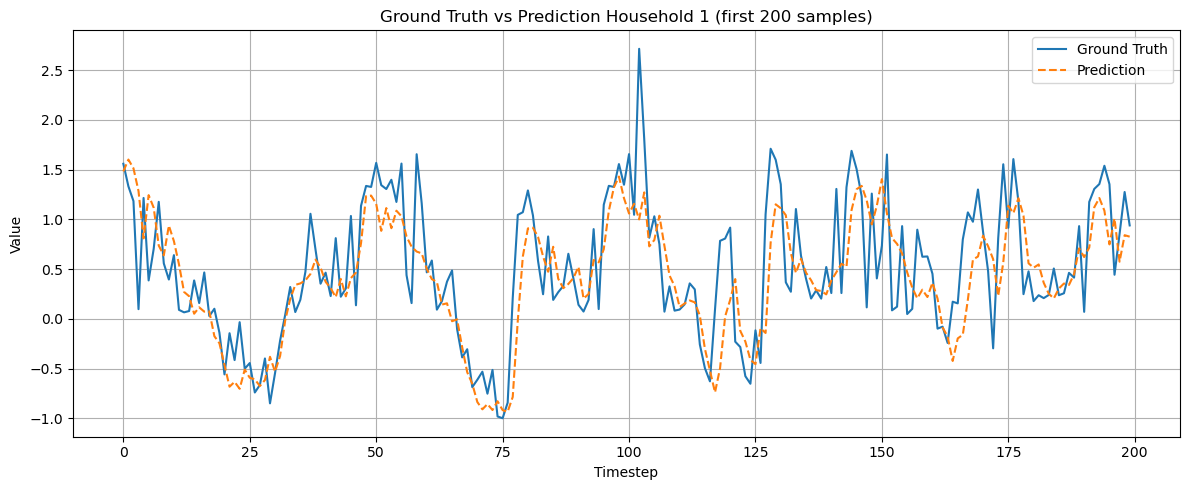

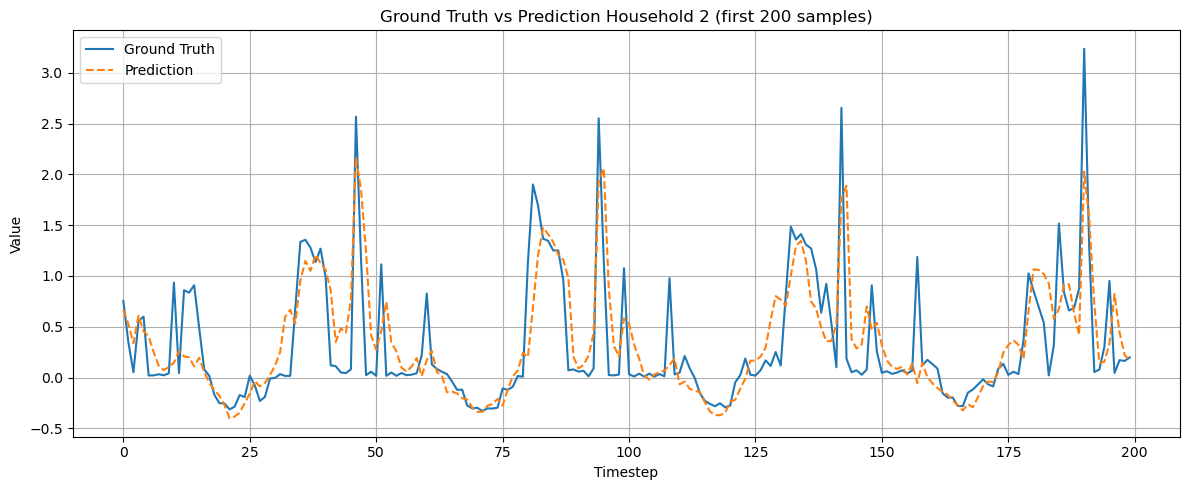

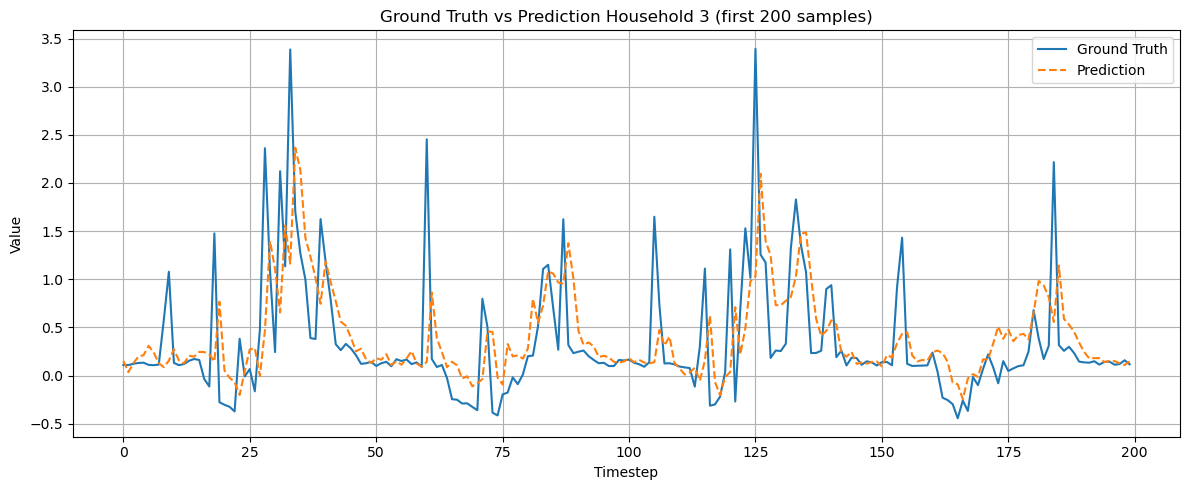

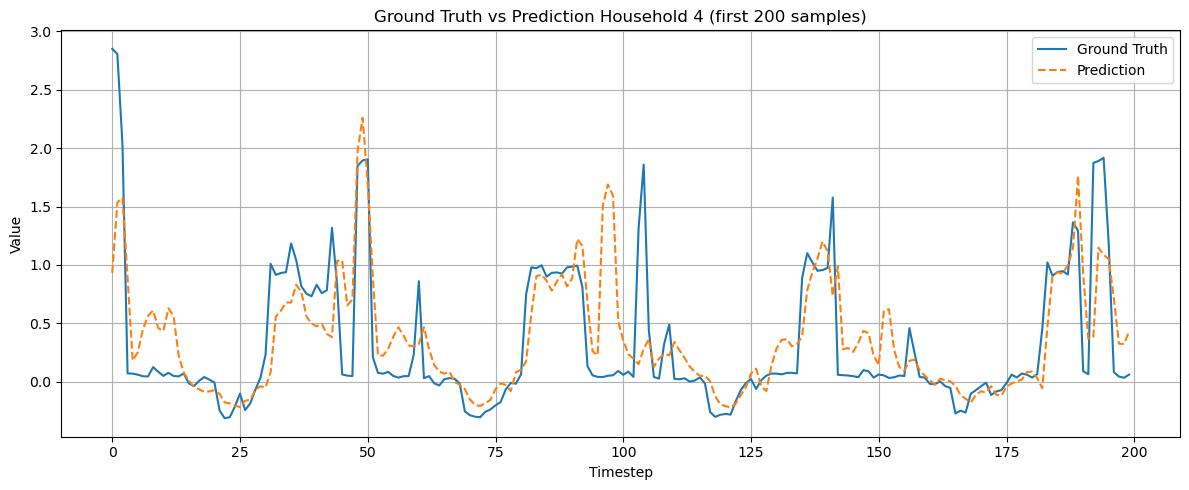

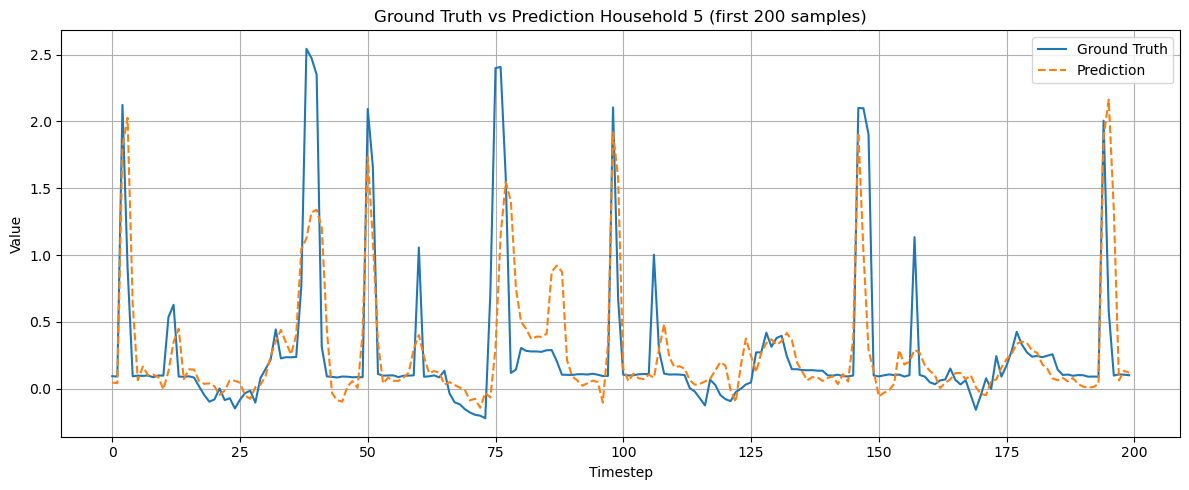

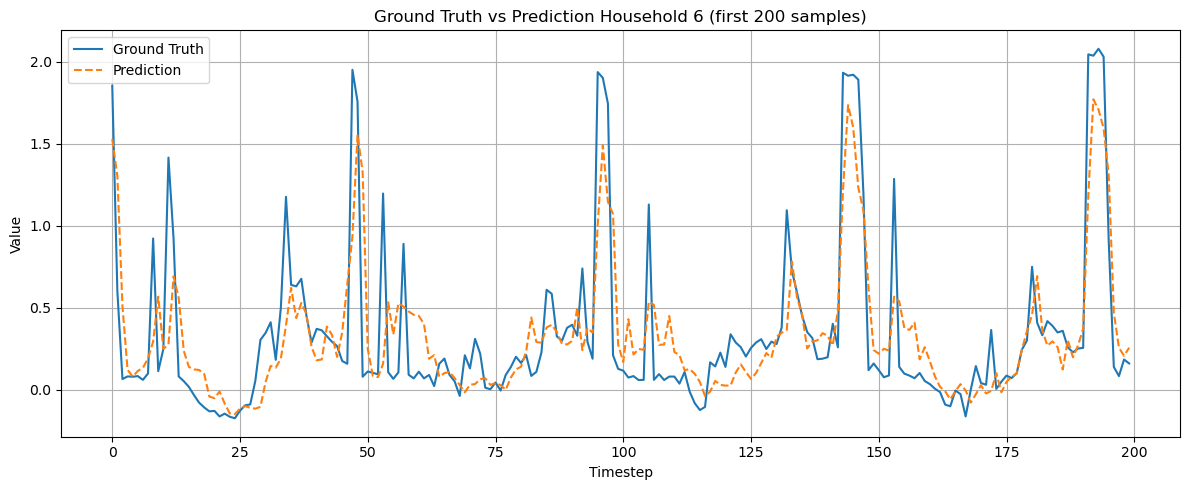

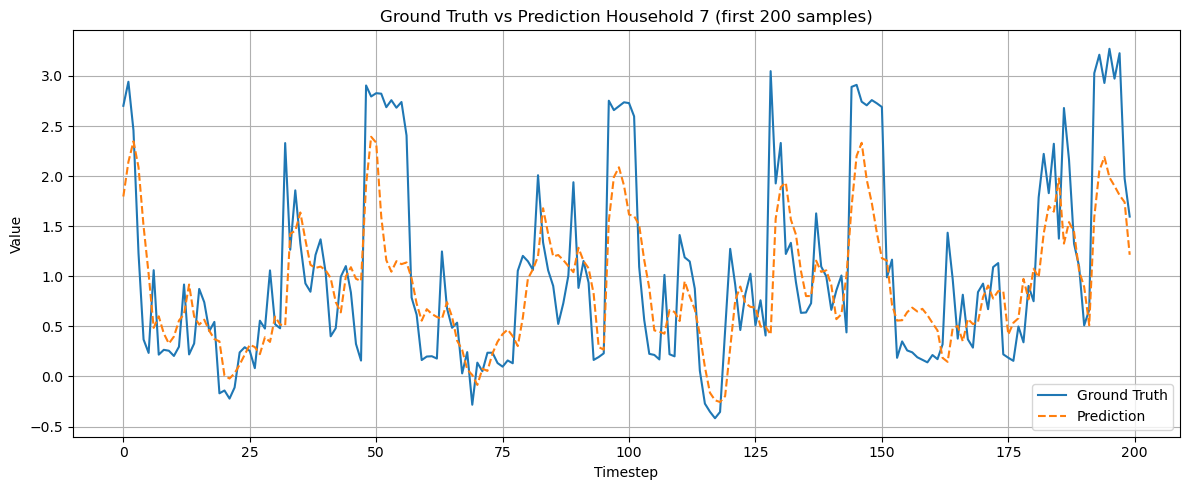

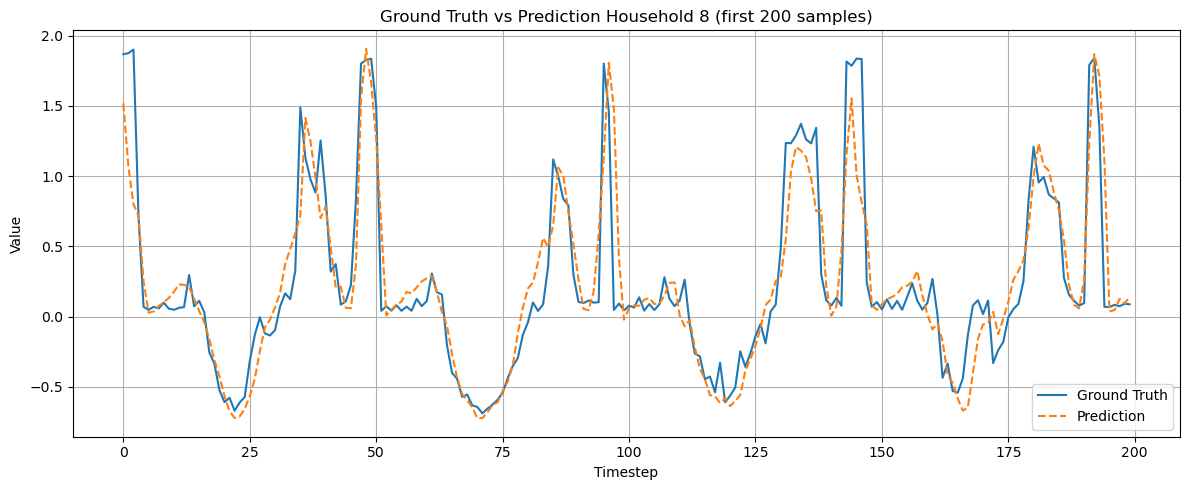

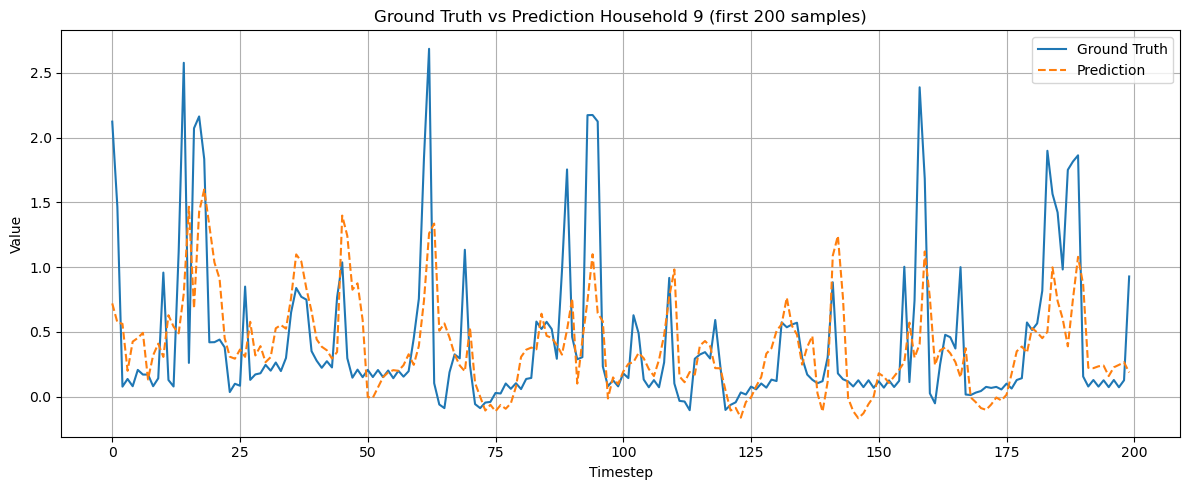

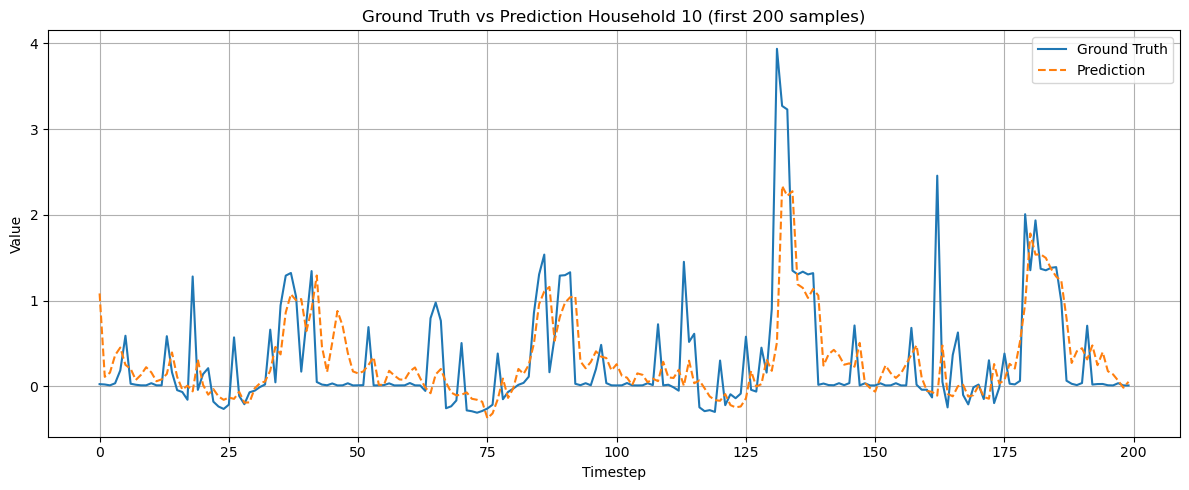

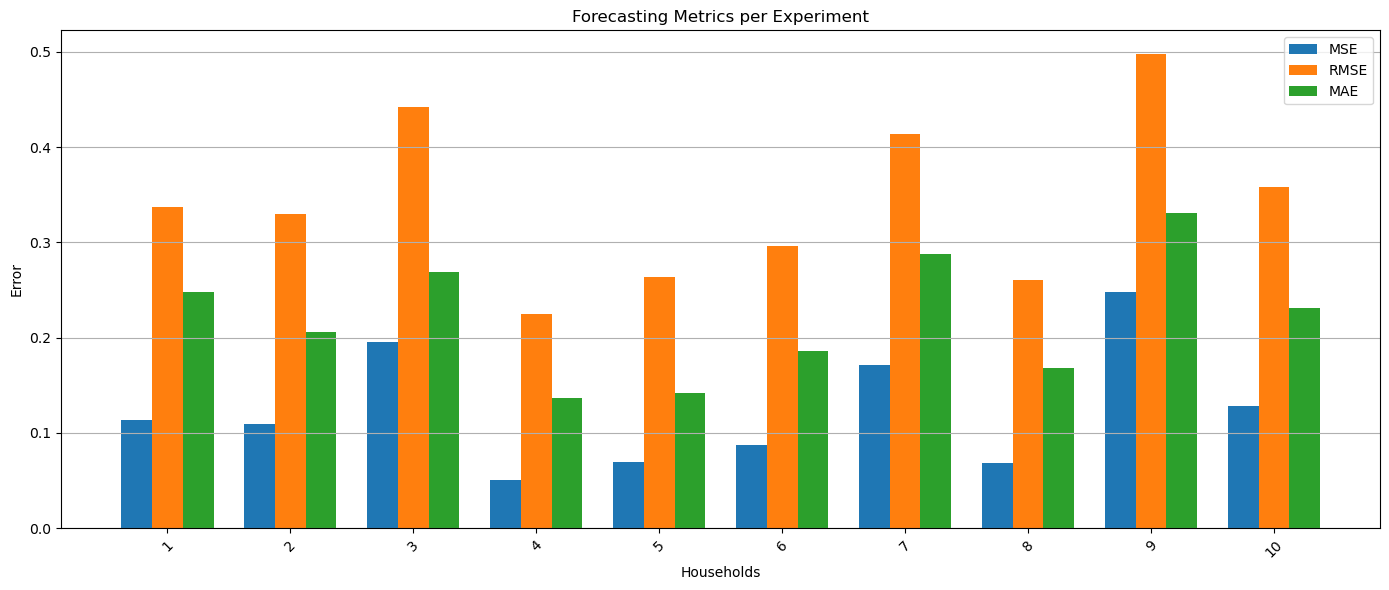

In [2]:
folder_path = "../outputs/forecaster"  # change this
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# For storing metrics
mse_list = []
rmse_list = []
mae_list = []
experiment_names = []

for i, file in enumerate(csv_files):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    
    target = df['target'].values[:200]
    output = df['output'].values[:200]

    # Plot predictions vs ground truth
    plt.figure(figsize=(12, 5))
    plt.plot(target, label='Ground Truth')
    plt.plot(output, label='Prediction', linestyle='dashed')
    plt.title(f'Ground Truth vs Prediction Household {i+1} (first 200 samples)')
    plt.xlabel('Timestep')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Compute metrics on full data
    target_all = df['target'].values
    output_all = df['output'].values

    mse = mean_squared_error(target_all, output_all)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target_all, output_all)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    experiment_names.append(f'{i+1}')

x = np.arange(len(experiment_names))
width = 0.25

plt.figure(figsize=(14, 6))
plt.bar(x - width, mse_list, width, label='MSE')
plt.bar(x, rmse_list, width, label='RMSE')
plt.bar(x + width, mae_list, width, label='MAE')

plt.xlabel('Households')
plt.ylabel('Error')
plt.title('Forecasting Metrics per Experiment')
plt.xticks(x, experiment_names, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## DQN Eval Metrics

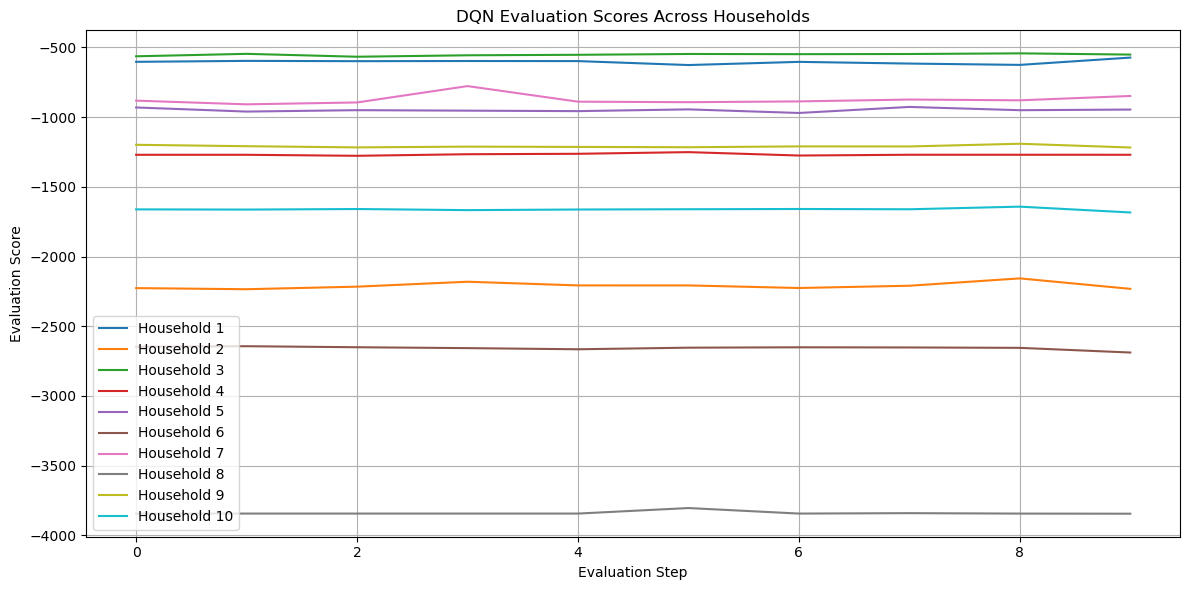

In [3]:
# Load your CSV
df = pd.read_csv(f'../outputs/LL_DQN_01/eval_metrics.csv')  # Replace with your CSV path

# Convert headers to strings if they are numbers
df.columns = df.columns.astype(str)

# Plot all experiments
plt.figure(figsize=(12, 6))

for column in df.columns:
    plt.plot(df[column], label=f'Household {column}')

plt.title('DQN Evaluation Scores Across Households')
plt.xlabel('Evaluation Step')
plt.ylabel('Evaluation Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## All Results

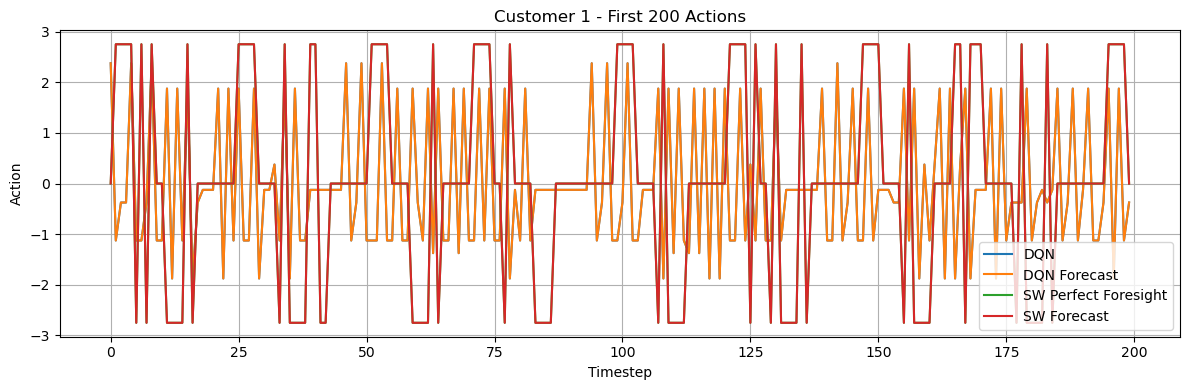

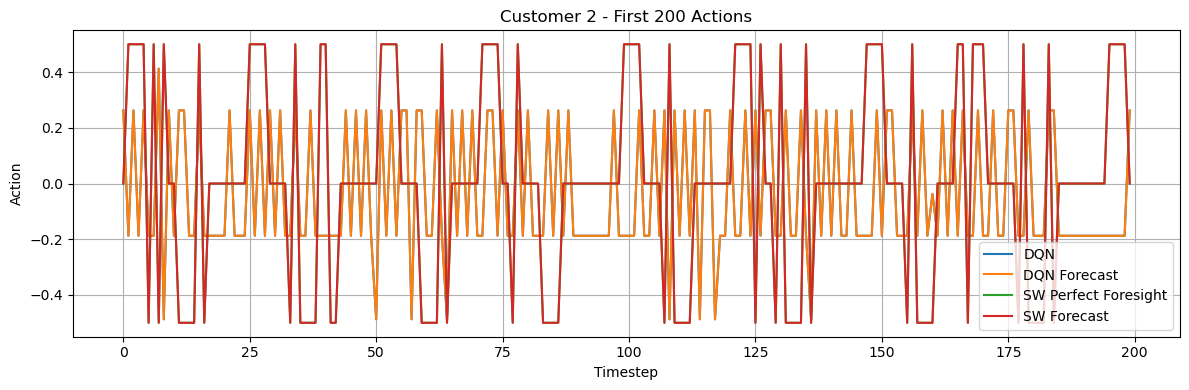

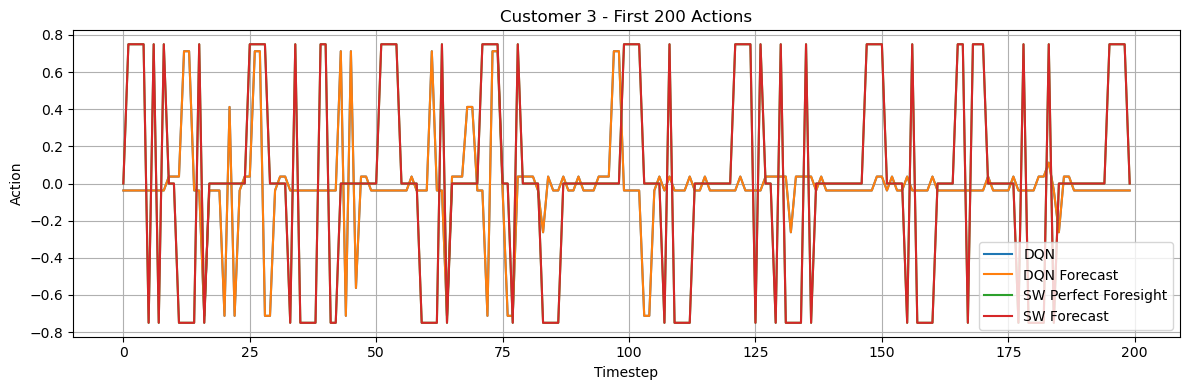

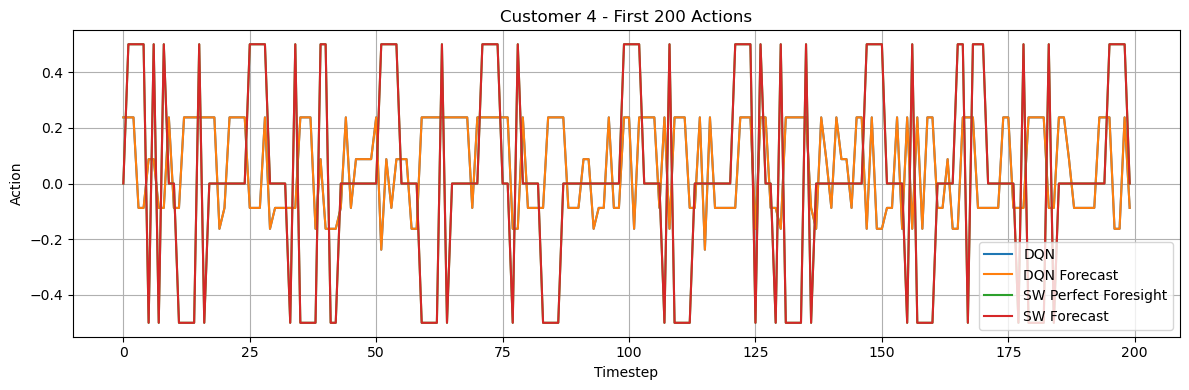

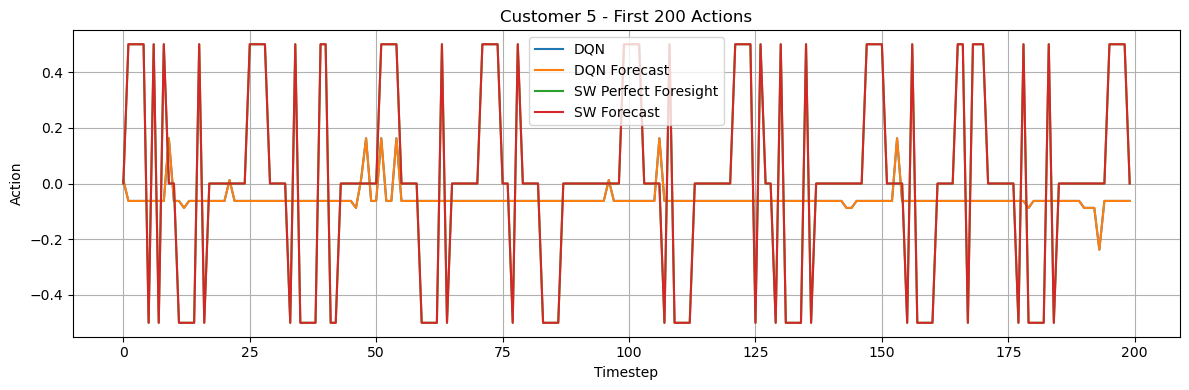

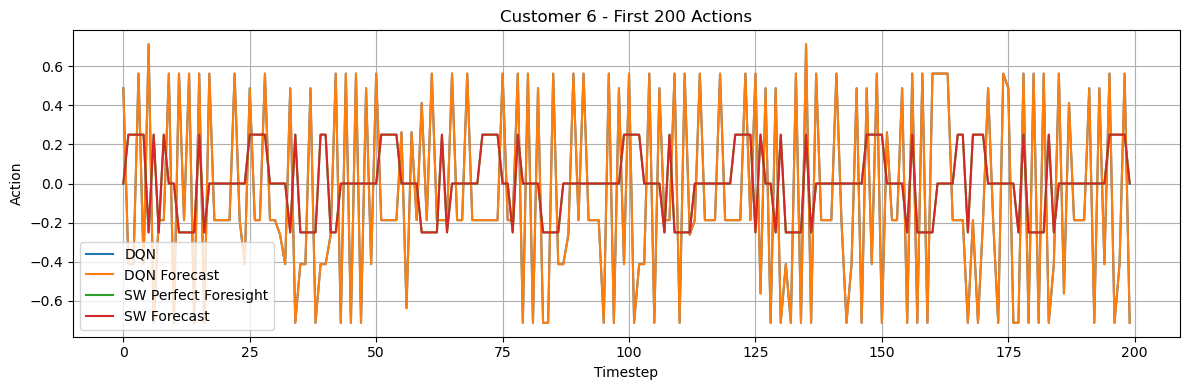

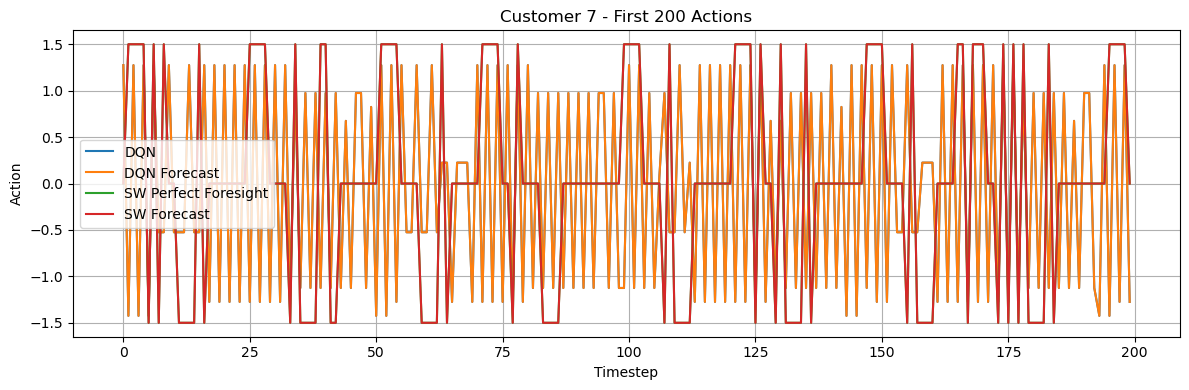

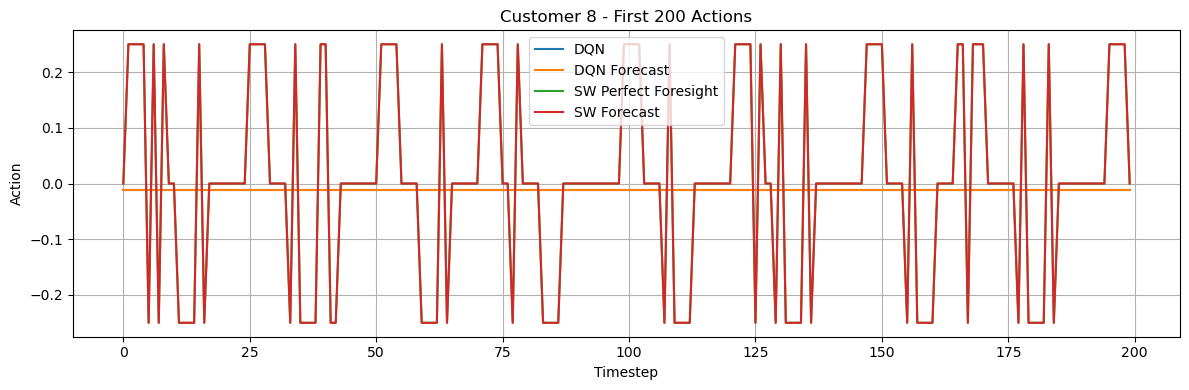

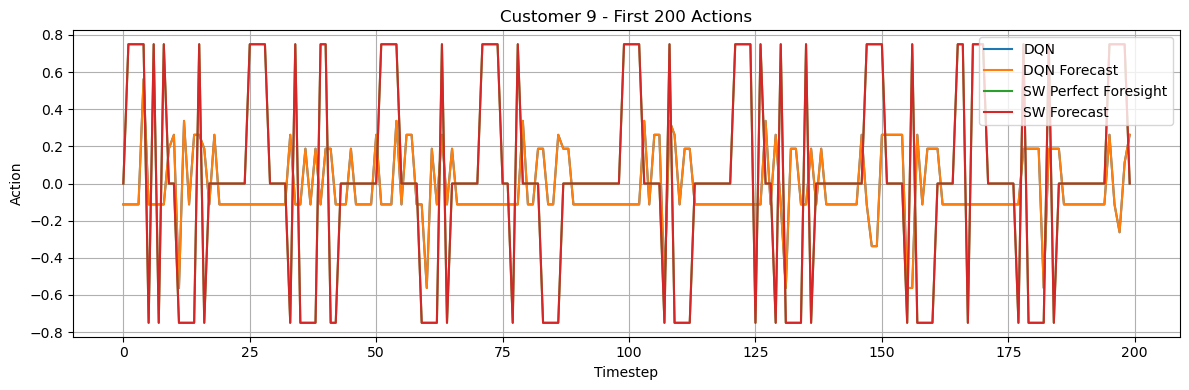

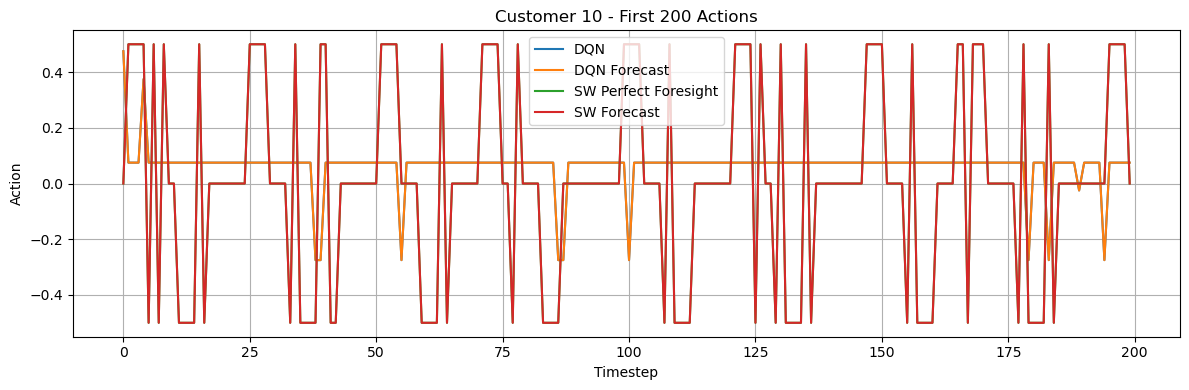

In [12]:
actions = pd.read_csv(f'../outputs/LL_DQN_02/actions.csv', header=0)
actions_forecast = pd.read_csv(f'../outputs/LL_DQN_02/actions_forecast.csv', header=0)
final_costs = pd.read_csv(f'../outputs/LL_DQN_02/final_cost.csv', header=0)
final_costs_forecast = pd.read_csv(f'../outputs/LL_DQN_02/final_cost_forecast.csv', header=0)

for customer in range(1,11):
    sliding_window_perfect = pd.read_csv(f'../outputs/baseline/sliding_window_perfect_foresight_{customer}.csv')['actions']
    sliding_window_forecast = pd.read_csv(f'../outputs/baseline/sliding_window_forecast_{customer}.csv')['actions']
    # Extract first 200 actions
    action_dqn = actions.iloc[:200, customer - 1]
    action_dqn_forecast = actions_forecast.iloc[:200, customer - 1]
    action_sw_perfect = sliding_window_perfect[48:248]
    action_sw_forecast = sliding_window_forecast[48:248]

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.plot(action_dqn.values, label='DQN')
    plt.plot(action_dqn_forecast.values, label='DQN Forecast')
    plt.plot(action_sw_perfect.values, label='SW Perfect Foresight')
    plt.plot(action_sw_forecast.values, label='SW Forecast')
    plt.title(f'Customer {customer} - First 200 Actions')
    plt.xlabel('Timestep')
    plt.ylabel('Action')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()